# Netflix Data Analysis Project
## Objective
The objective of this project is to analyze Netflix movies and TV shows data, perform data cleaning ,exploratory data analysis (EDA), and derive meningful insights using visualizations

## Dataset Overview

In [2]:
import pandas as pd
import numpy as np
 #LOADING DATASET 
raw_path = "./data/raw/netflix1.csv"
df = pd.read_csv(raw_path)
#check basic info
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

## Data Cleaning

In [13]:
df['director'] = df['director'].fillna("unknown")
df['country'] = df['country'].fillna("unknown")
df['date_added'] = df['date_added'].fillna("")

In [14]:
df = df.dropna(subset=['title'])

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['release_year'] = df['release_year'].astype('Int64')

In [17]:
df = df.drop_duplicates()

In [18]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   Int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: Int64(1), datetime64[ns](1), object(8)
memory usage: 695.4+ KB


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [20]:
clean_path = "./data/clean/netflix_cleaned.csv"
df.to_csv(clean_path, index=False)

In [21]:
#data visualization

## Exploratory Data Analysis(EDA)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

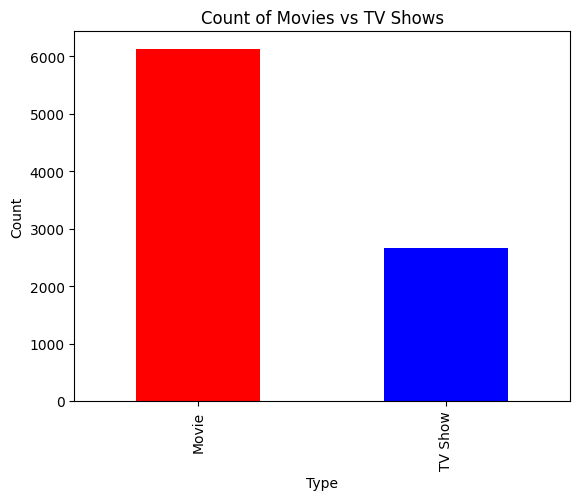

In [23]:
df['type'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

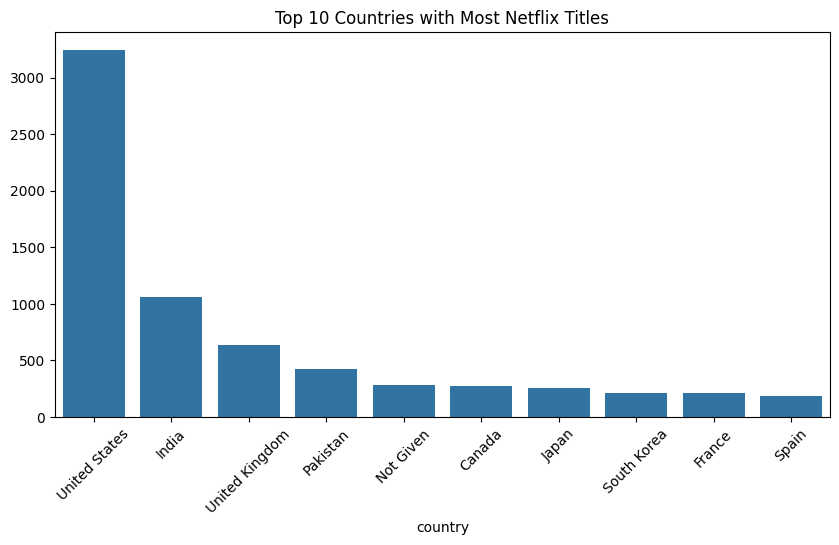

In [25]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Netflix Titles")
plt.show()

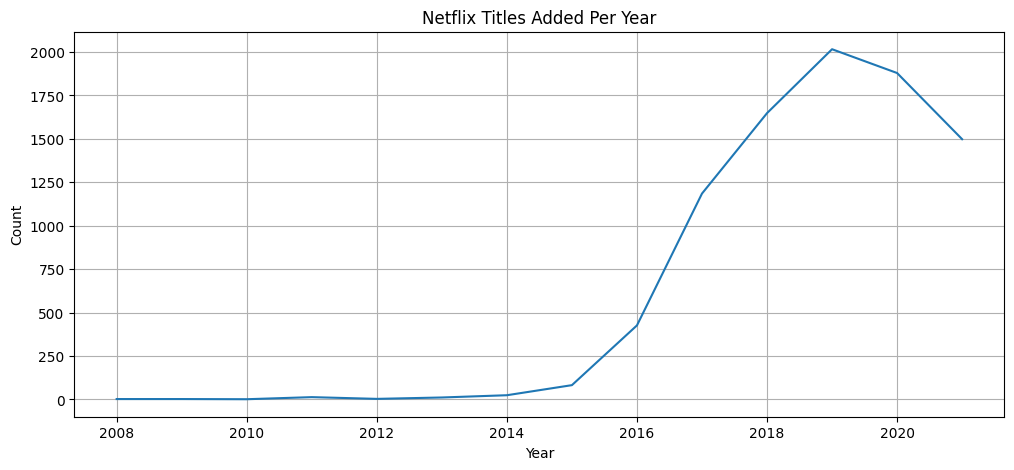

In [29]:
df['year_added'] = df['date_added'].dt.year
yearly = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(yearly.index, yearly.values)
plt.title("Netflix Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()

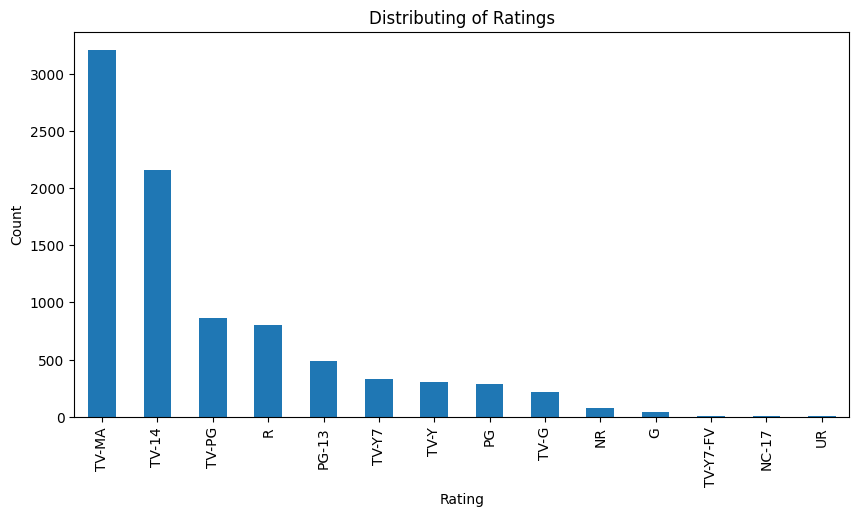

In [30]:
plt.figure(figsize=(10,5))
df['rating'].value_counts().plot(kind='bar')
plt.title("Distributing of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

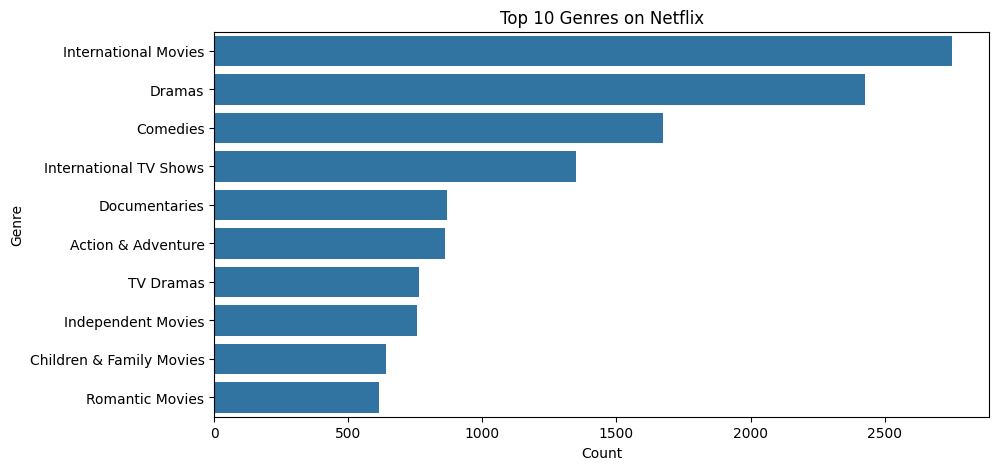

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Split genres and count them
genre_list = df['listed_in'].str.split(', ')
genres = genre_list.explode()

top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

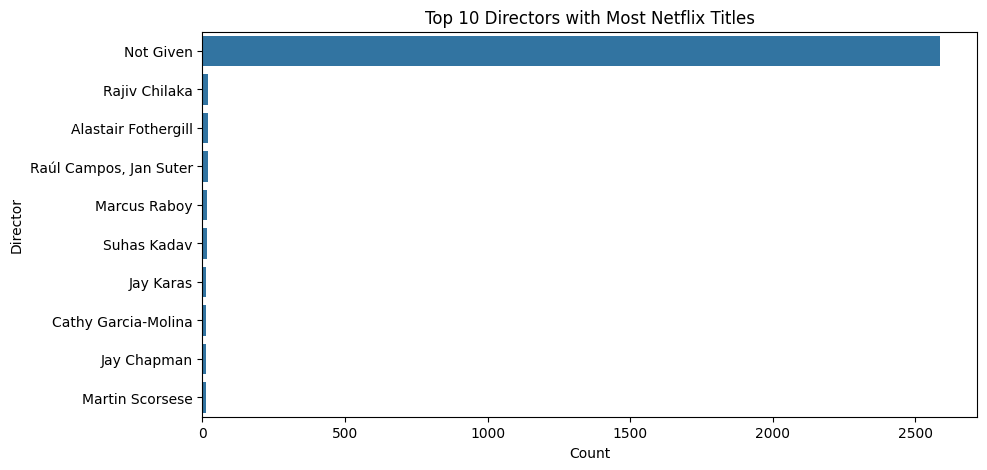

In [32]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors with Most Netflix Titles")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_15728\148882693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(int)


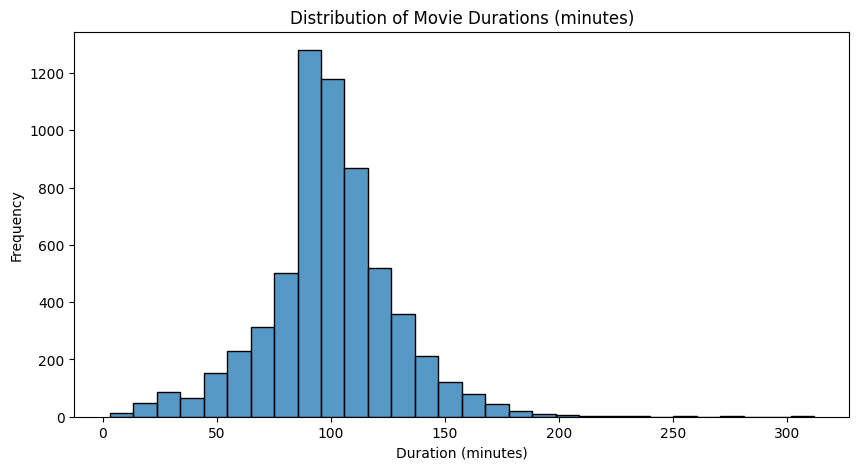

In [33]:
# Only consider movies
movies = df[df['type'] == 'Movie']

# Extract duration number
movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10,5))
sns.histplot(movies['duration_num'], bins=30)
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

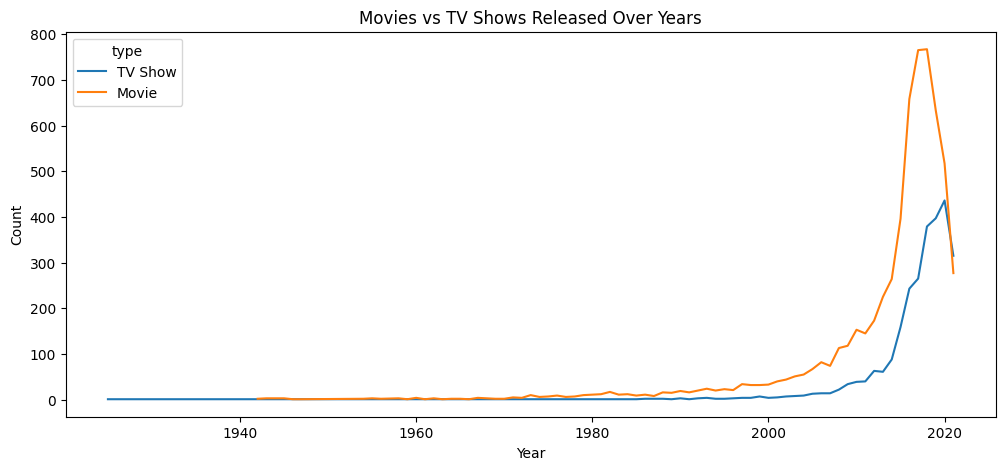

In [34]:
trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.lineplot(data=trend, x='release_year', y='count', hue='type')
plt.title("Movies vs TV Shows Released Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

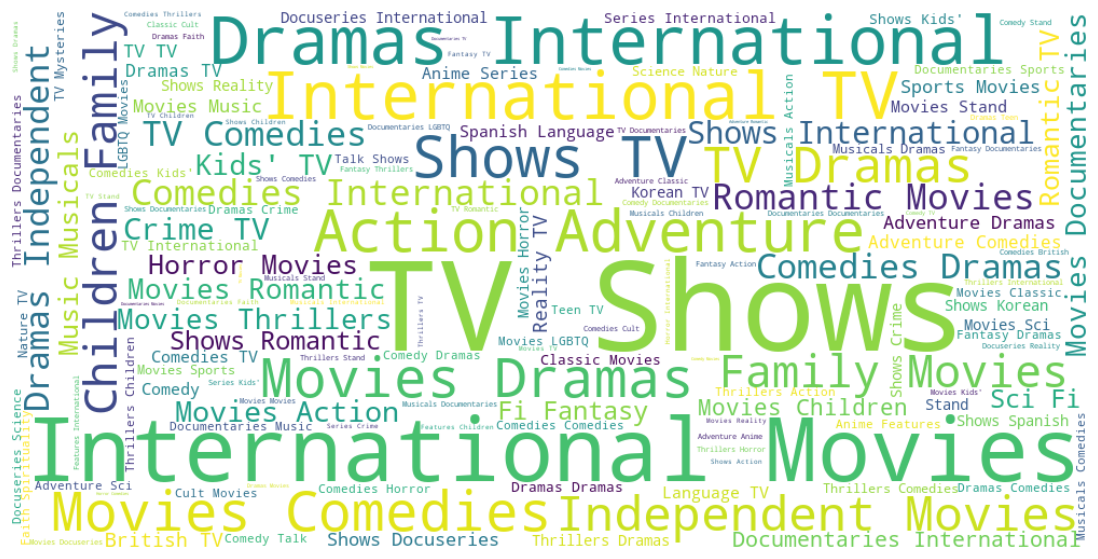

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(df['listed_in'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Key insghts and Conclusion

### Key Insights
- Netflix has more Movies compared to TV Shows.
- Most of the content is produced in the United States.
- There is a significant increase in Netflix content after 2015.
- Drama and International Movies are among the most common genres.

### Conclusion
This analysis helps in understanding Netflix's content strategy and trends over time.
Such insights can be useful for business decisions like content investment and regional focus.